In [35]:
# 1. Importar librerías y cargar datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_parquet('../data/processed/final_feature_data.parquet')
df=pd.read_parquet('../data/processed/final_feature_datacombinado_0_3_basal_reduced.parquet')
print(f'Shape: {df.shape}')
print(df['Clase'].value_counts())
df.head()

Shape: (192909, 17)
Clase
reposo       39318
basal        30719
adelante     30718
atras        30718
derecha      30718
izquierda    30718
Name: count, dtype: int64


,RMS_EXG Channel 0,WL_EXG Channel 0,RMS_EXG Channel 1,WL_EXG Channel 1,RMS_EXG Channel 2,WL_EXG Channel 2,RMS_EXG Channel 3,WL_EXG Channel 3,RMS_EXG Channel 4,WL_EXG Channel 4,RMS_EXG Channel 5,WL_EXG Channel 5,RMS_EXG Channel 6,WL_EXG Channel 6,RMS_EXG Channel 7,WL_EXG Channel 7,Clase
0,0.698081,36.252326,0.618846,6.380437,0.689525,23.421976,0.907334,3.904149,0.655242,24.285225,0.487214,32.588809,1.952083,5.778219,0.721364,5.614925,basal
1,0.427620,1.629236,0.088849,7.743003,0.070524,1.366856,0.066120,1.112509,1.262564,6.560996,0.677214,70.930582,0.044291,3.129505,0.113337,0.633164,basal
2,0.482073,32.586622,1.229305,5.608900,0.988155,19.602106,1.126971,3.939412,0.942297,21.436385,1.115468,28.325478,0.217760,4.963371,1.152618,5.105074,basal
3,0.945174,1.559907,1.306634,7.688056,1.233141,1.198234,1.183498,1.112835,1.397356,5.924343,0.276229,65.074093,1.195615,2.952183,1.146503,0.579069,basal
4,0.728195,1.461473,0.476904,7.143932,0.292795,1.263215,0.408530,0.955444,0.741229,5.829432,0.873935,65.754309,0.365664,2.957607,0.466683,0.580165,basal


In [36]:
# 2. Preparar X e y
X = df.drop('Clase', axis=1)
y = df['Clase']


Train: (48227, 16), Validación: (48227, 16), Test: (96455, 16)
Accuracy (validación): 0.9949820639890518
Reporte de clasificación (validación):
              precision    recall  f1-score   support

    adelante       1.00      1.00      1.00      7680
       atras       0.97      1.00      0.99      7679
       basal       1.00      1.00      1.00      7680
     derecha       1.00      0.99      1.00      7680
   izquierda       1.00      0.99      1.00      7679
      reposo       1.00      0.99      1.00      9829

    accuracy                           0.99     48227
   macro avg       0.99      1.00      0.99     48227
weighted avg       1.00      0.99      1.00     48227

Accuracy (test): 0.9946710901456638
Reporte de clasificación (test):
              precision    recall  f1-score   support

    adelante       1.00      1.00      1.00     15359
       atras       0.97      1.00      0.99     15359
       basal       1.00      1.00      1.00     15360
     derecha       1.00    

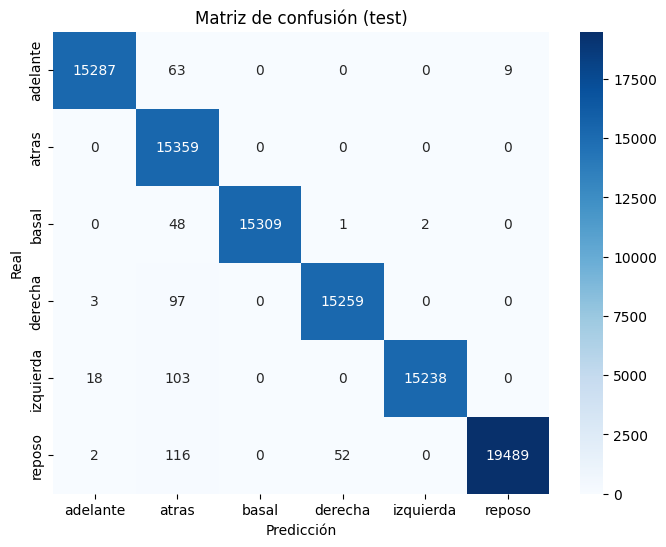

In [37]:
# Nueva partición: entrenamiento, validación y test
from sklearn.model_selection import train_test_split

# 1. Separar conjunto de test (50%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# 2. Separar conjunto de validación (50% de lo que queda)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Validación: {X_val.shape}, Test: {X_test.shape}")

# Entrenamiento usando solo el conjunto de entrenamiento
clf =DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=5)
clf.fit(X_train, y_train)

# Evaluación en validación
y_val_pred = clf.predict(X_val)
print('Accuracy (validación):', accuracy_score(y_val, y_val_pred))
print('Reporte de clasificación (validación):')
print(classification_report(y_val, y_val_pred))

# Evaluación final en test
y_test_pred = clf.predict(X_test)
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))
print('Reporte de clasificación (test):')
print(classification_report(y_test, y_test_pred))

# Matriz de confusión para test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (test)')
plt.show()

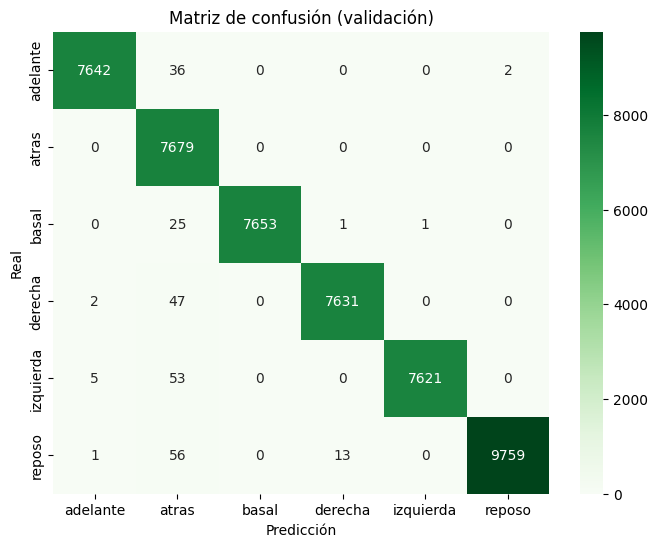

In [38]:
# Matriz de confusión para validación
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (validación)')
plt.show()

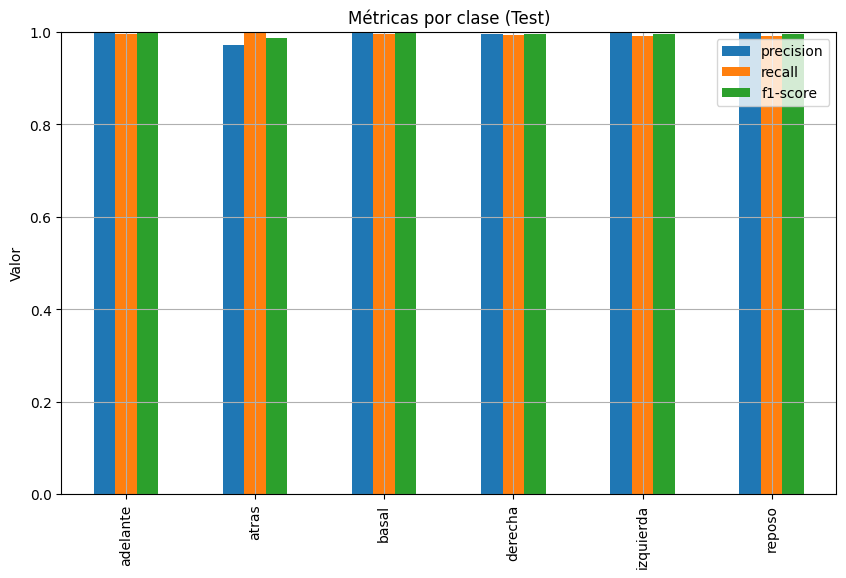

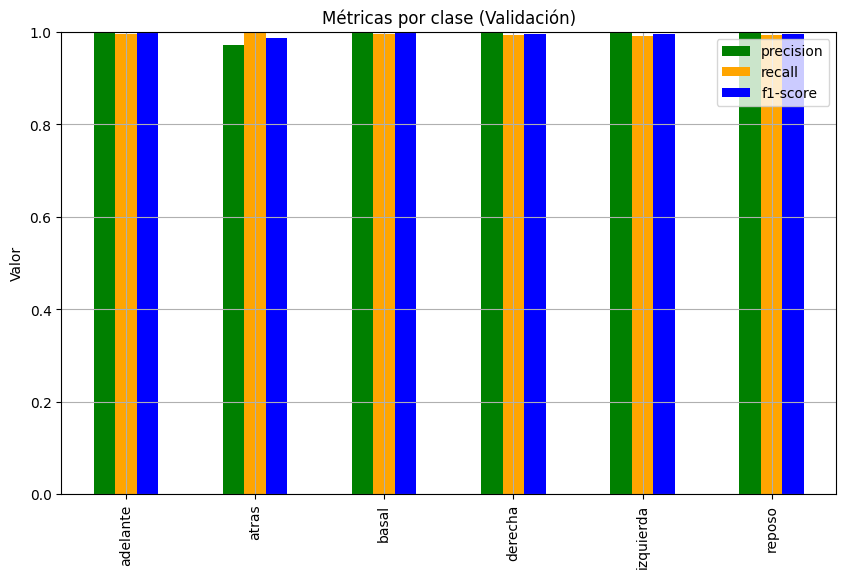

In [39]:
# Visualización de métricas por clase (precision, recall, f1-score)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Para test
report_test = classification_report(y_test, y_test_pred, output_dict=True)
df_report_test = pd.DataFrame(report_test).transpose().iloc[:-3]
df_report_test[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6))
plt.title('Métricas por clase (Test)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(True)
plt.show()

# Para validación
report_val = classification_report(y_val, y_val_pred, output_dict=True)
df_report_val = pd.DataFrame(report_val).transpose().iloc[:-3]
df_report_val[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), color=['green','orange','blue'])
plt.title('Métricas por clase (Validación)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [40]:
# Validación cruzada (cross-validation)
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf_cv = DecisionTreeClassifier(criterion='entropy',random_state=42)

scores = cross_val_score(clf_cv, X, y, cv=cv, scoring='accuracy')
print('Accuracy por fold:', scores)
print(f'Accuracy promedio (cross-validation): {scores.mean():.4f} ± {scores.std():.4f}')

Accuracy por fold: [0.99994816 0.99994816 0.99997408 0.99997408 0.99997408]
Accuracy promedio (cross-validation): 1.0000 ± 0.0000


In [41]:
# Guardar el modelo entrenado en la carpeta models/
import joblib

joblib.dump(clf, '../models/DecisionTreeClassifier_emg_v3_entropy.pkl')
print('Modelo guardado en models/rDecisionTreeClassifier_emg_v3_entropy.pkl')

Modelo guardado en models/rDecisionTreeClassifier_emg_v3_entropy.pkl
